# **Gaussian Distribution**
- Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
- In graph form, normal distribution will appear as a bell curve.

## Equation
The general form of its probability density function is
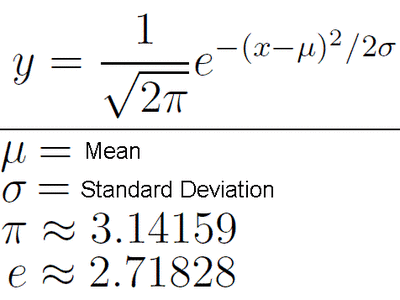

## When would you use Gaussian distribution?
- When you have normally distributed data, the standard deviation becomes particularly valuable.
- You can use it to determine the proportion of the values that fall within a specified number of standard deviations from the mean. For example, in a normal distribution, 68% of the observations fall within +/- 1 standard deviation from the mean.
- Gaussian distribution describes the percentage of the data that falls within specific numbers of standard deviations from the mean for bell-shaped curves.

## Properties
It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions.
### Mean
The mean is the central tendency of the distribution. It defines the location of the peak for normal distributions.
### Standard deviation
The standard deviation determines how far away from the mean the values tend to fall. It defines the width of the normal distribution.It represents the typical distance between the observations and the average.
### Shape
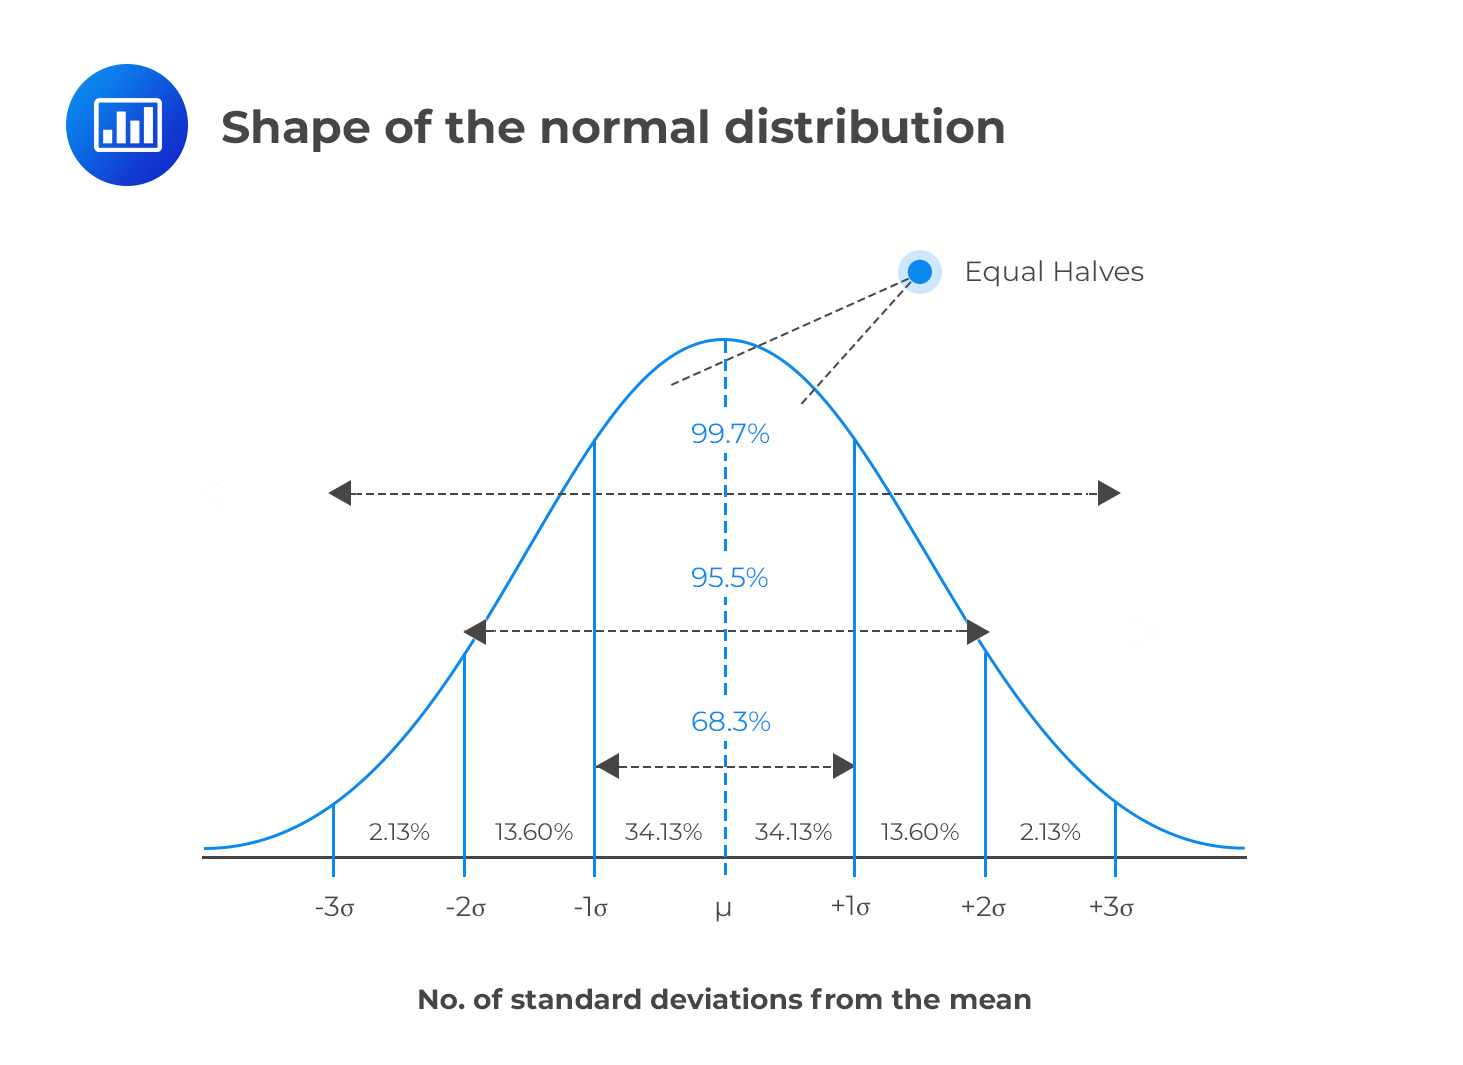

## Histogram

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data\weight-height.csv")
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [10]:
# Height Statistics
mean = df['Height'].mean()
std = df['Height'].std()
print('Min Height = ', df['Height'].min())
print('Max Height = ', mean)
print('Std dev Height = ', std)

Min Height =  54.2631333250971
Max Height =  66.36755975482106
Std dev Height =  3.847528120773233


Text(0, 0.5, 'Count')

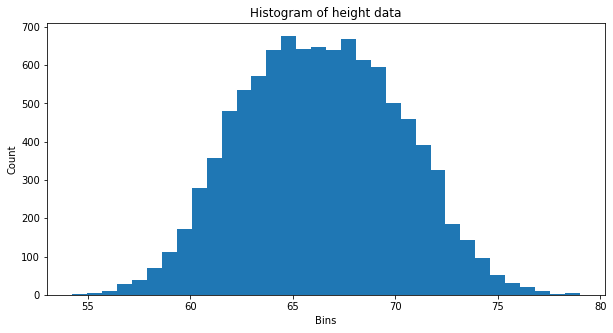

In [11]:
#Plot Histogram
fig, axs = plt.subplots(figsize = (10,5))
axs.hist(df['Height'], bins = 34)
axs.set_title('Histogram of height data')
axs.set_xlabel('Bins')
axs.set_ylabel('Count') 

## Distribution Plot


In [12]:
from scipy.stats import norm

Text(0, 0.5, 'Density')

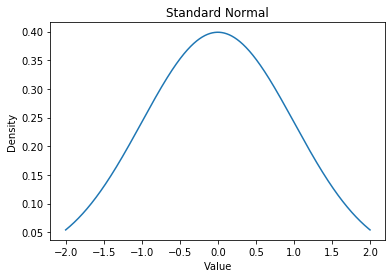

In [13]:
domain = np.linspace(-2,2,1000)
plt.plot(domain, norm.pdf(domain,0,1))
# Here our mean is zero and standard deviation is one
plt.title("Standard Normal")
plt.xlabel("Value")
plt.ylabel("Density")

## Limitations
Normal distributions are not suitable for data with data with larger standard deviations as the normal curve will disperse wildly and not result in a good fit. Hence, it is not a good approximation.

# Growth Curve
- A growth curve is a graphical representation of how a particular quantity increases over time.
- Growth curves are used in statistics to determine the type of growth pattern of the quantity—be it linear, exponential, or cubic.
- Growth curves are widely used in biology for quantities such as population size or biomass, individual body height or biomass.

## When would you use Growth Curves?
Growth curves are used in statistics to determine the type of growth pattern of the quantity—be it linear, exponential, or cubic.

## Curve Fitting
Curve fitting is the process of constructing a curve, or mathematical function, that has the best fit to a series of data points, possibly subject to constraints.

[32.84758573  0.77182126]


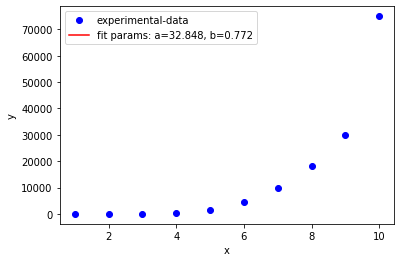

In [14]:
from scipy.optimize import curve_fit
#Fitting function
def func(x, a, b):
    return a*np.exp(b*x)
    #return a*x+b
 
#Experimental x and y data points    
xData = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
yData = np.array([1, 9, 50, 300, 1500, 4500, 10000, 18000, 30000, 75000])
 
#Plot experimental data points
plt.plot(xData, yData, 'bo', label='experimental-data')
  
 
#Perform the curve-fit
popt, pcov = curve_fit(func, xData, yData)
print(popt)
 
#x values for the fitted function
xFit = np.arange(0.0, .0, 0.01)
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Student's T Distribution /  T-test
The T-test is used to determine whether the means of two groups are equal to each other not. Finding meaningful prediction with small samples. Works better with datasets with less than 50 observations.


## Limitations
The T distribution is similar to the normal distribution, just with fatter tails.
Its shortcoming only arises when there’s a need for perfect normality. However, the difference between using a normal and T distribution is relatively small.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 

In [14]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

Created a function plot_distribution to plot distributions along with their mean

In [1]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [36]:
x = np.arange(-15, 15, .2 )
len(x)
plot_distribution(x)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

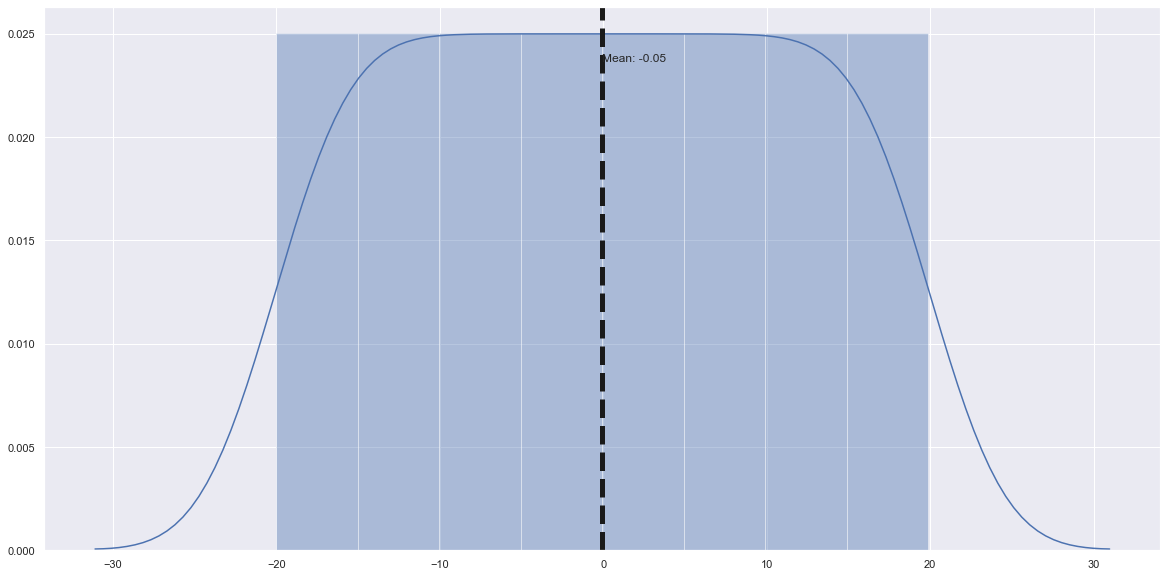

In [39]:
y= np.arange(-20, 20, .1)
plot_distribution(y)

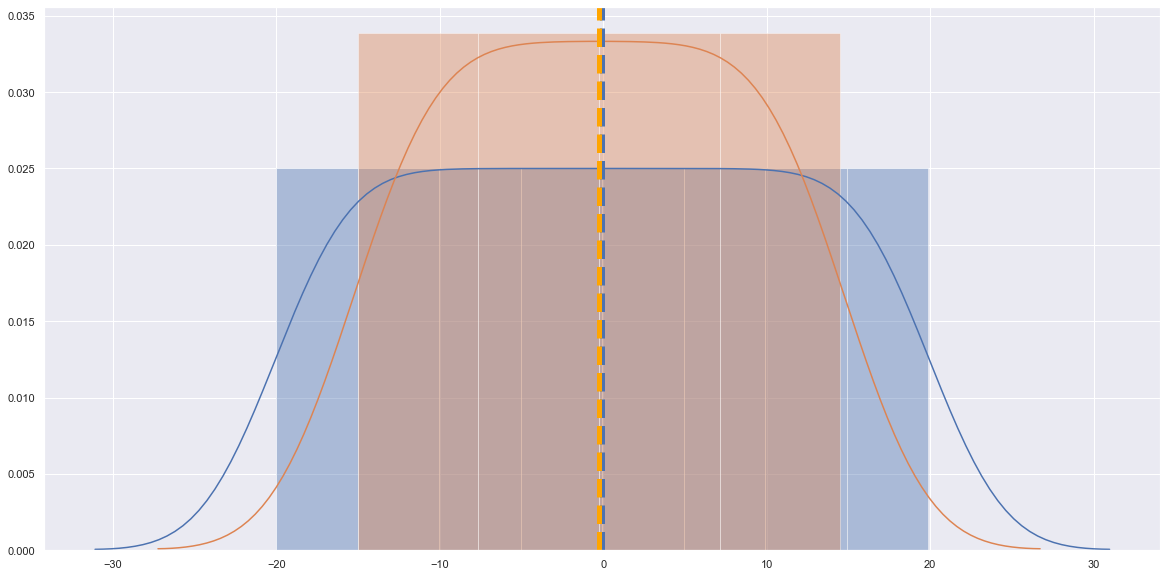

In [40]:
plt.figure()
ax1 = sns.distplot(y)
ax2 = sns.distplot(x)
plt.axvline(np.mean(y), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(x), color='orange', linestyle='dashed', linewidth=5)

The null hypothesis (H0) is that the two means are equal and the alternate hypothesis is that they're not. Based on the values we receive we either reject H0 or we fail to reject the H0.

In [41]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [42]:
sample_size = 15
x_sampled = np.random.choice(x, sample_size)
y_sampled = np.random.choice(y, sample_size)
compare_2_groups(x_sampled, y_sampled, 0.05, sample_size)

Statistics=-0.459, p=0.650
Same distributions (fail to reject H0)
